In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")

In [20]:
in_channels = 3
out_channels = 15
kernel_size = 5
stride = 1
padding = 0

## Number of Pixels in next layer after convolution operation
```python
p_out = ((p_in - k + 2*p) // s) + 1
```

In [21]:
c = nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding)
print(c)

ConvTranspose2d(3, 15, kernel_size=(5, 5), stride=(1, 1))


In [22]:
c.weight.shape, c.bias.shape

(torch.Size([3, 15, 5, 5]), torch.Size([15]))

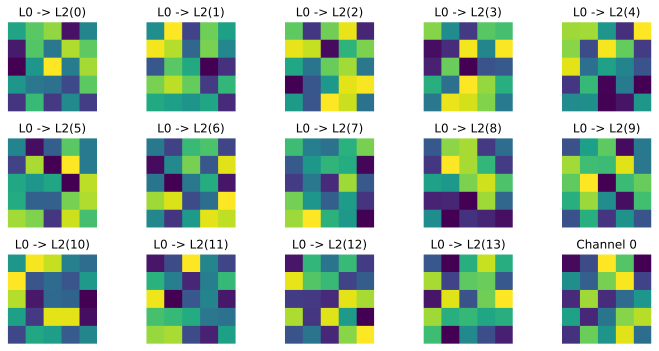

In [23]:
fig, axs = plt.subplots(3, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(c.weight[0, i, :, :].detach().numpy())
    ax.set_title(f"L0 -> L2({i})")
    ax.axis("off")
plt.title(f"Channel {0}")
plt.tight_layout()
plt.show()

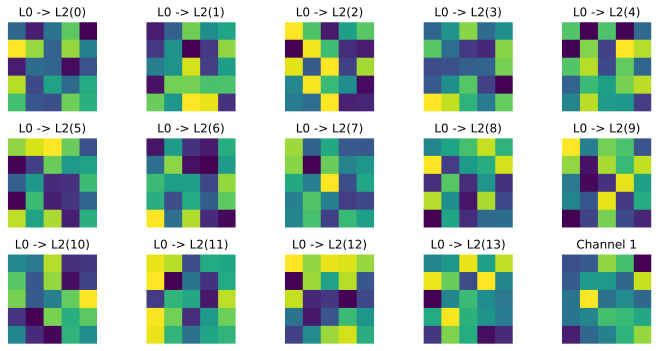

In [24]:
fig, axs = plt.subplots(3, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(c.weight[1, i, :, :].detach().numpy())
    ax.set_title(f"L0 -> L2({i})")
    ax.axis("off")
plt.title(f"Channel {1}")
plt.tight_layout()
plt.show()

In [25]:
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.5578268..3.6295896].


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


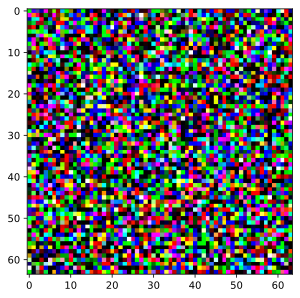

In [26]:
img_size = (1, 3, 64, 64)
img = torch.randn(img_size)
img_to_view = img.permute(2, 3, 1, 0).numpy()
print(img.shape)
print(img_to_view.shape)

plt.imshow(np.squeeze(img_to_view))

In [27]:
conv_res = c(img)

img.shape, conv_res.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1, 15, 68, 68]))

torch.Size([1, 15, 68, 68])
(68, 68, 15, 1)


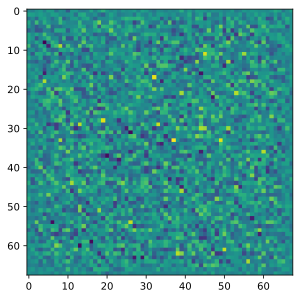

In [30]:
img_to_view = conv_res.permute(2, 3, 1, 0).detach().numpy()
print(conv_res.shape)
print(img_to_view.shape)

plt.imshow(np.squeeze(img_to_view[:,:,0]))

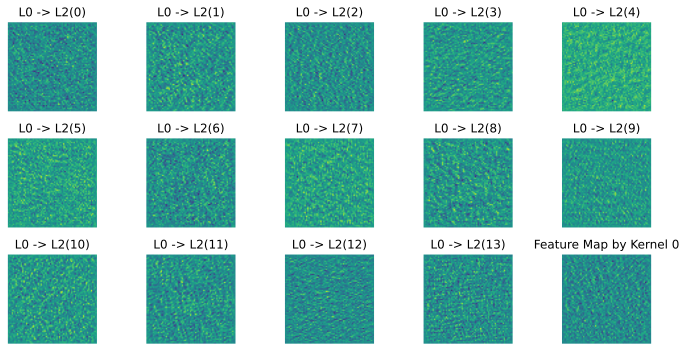

In [31]:
fig, axs = plt.subplots(3, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(conv_res[0, i, :, :].detach().numpy())
    ax.set_title(f"L0 -> L2({i})")
    ax.axis("off")
plt.tight_layout()
plt.show()